In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
#listing down the columns

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns

* Survived
* PClass
* Sex
* SibSp
* Parch
* Embarked


# Numerical columns

* Age 
* Fare 
* Passenger

# Mixed Columns

* Name
* Ticket
* Cabin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few Conclusions

1. Missing value in Age,Cabin and Embarked columns.
2. More than 70 percent values are missing in cabin columns, will have to drop.
3. Few columns have inappropriate data types.

In [9]:
# Dropping cabin column

df.drop(columns=['Cabin'],inplace=True)

In [10]:
#Imputing missing values for age
# Strategy = mean

df['Age'].fillna(df['Age'].mean(), inplace = True)

/tmp/ipykernel_37789/2557161729.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [11]:
#Imputing missing values for embarked

#finding the most appeared value in embarked column

df['Embarked'].value_counts()

# S it is

df['Embarked'].fillna('S',inplace=True)

/tmp/ipykernel_37789/1294682524.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [12]:
#want to check one more thing

# should i change the SibSp and Parch to categories

df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

# Changing data type for the following cols

 * Survived(category)
 * PClass(category)
 * Sex(category)
 * Age(int)
 * Embarked(category)

In [14]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [16]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


# Univariate & BivariateAnalysis

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


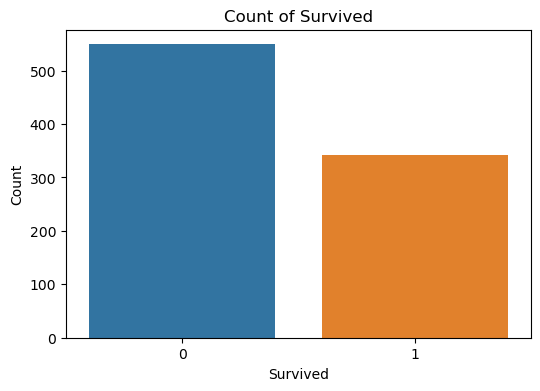

Out of 891 -- 62% people died in the accident


In [25]:
# Countplot of the 'Survived' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

death_percent = round((df['Survived'].value_counts().values[0]/891)*100)

print("Out of 891 -- {}% people died in the accident".format(death_percent))

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


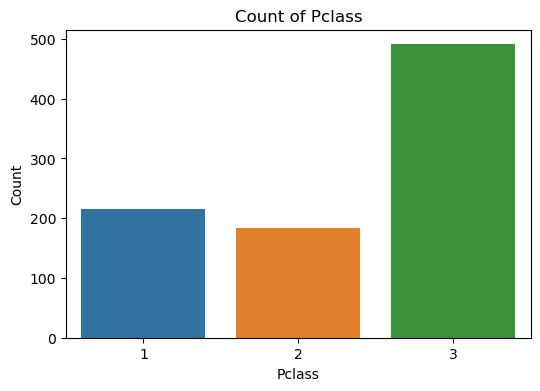


Frequency Counts and Percentages for Pclass:


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

In [28]:
# Countplot of the 'Pclass' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Count of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Print customized frequency counts and percentages for Pclass
pclass_counts = df['Pclass'].value_counts()
pclass_percentages = (pclass_counts / len(df)) * 100

print("\nFrequency Counts and Percentages for Pclass:")
display(pclass_counts)
display(pclass_percentages)

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


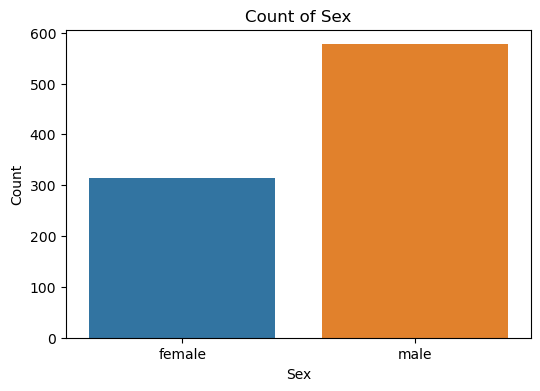


Frequency Counts and Percentages for Sex:


Sex
male      577
female    314
Name: count, dtype: int64

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

In [29]:
# Countplot of the 'Sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Print customized frequency counts and percentages for Sex
sex_counts = df['Sex'].value_counts()
sex_percentages = (sex_counts / len(df)) * 100

print("\nFrequency Counts and Percentages for Sex:")
display(sex_counts)
display(sex_percentages)

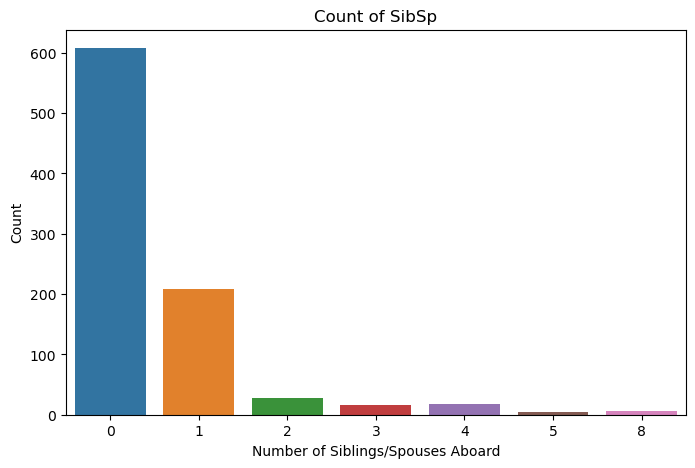


Frequency Counts and Percentages for SibSp:


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64

In [30]:
# Countplot of the 'SibSp' column
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', data=df)
plt.title('Count of SibSp')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Count')
plt.show()

# Print customized frequency counts and percentages for SibSp
sibsp_counts = df['SibSp'].value_counts()
sibsp_percentages = (sibsp_counts / len(df)) * 100

print("\nFrequency Counts and Percentages for SibSp:")
display(sibsp_counts)
display(sibsp_percentages)

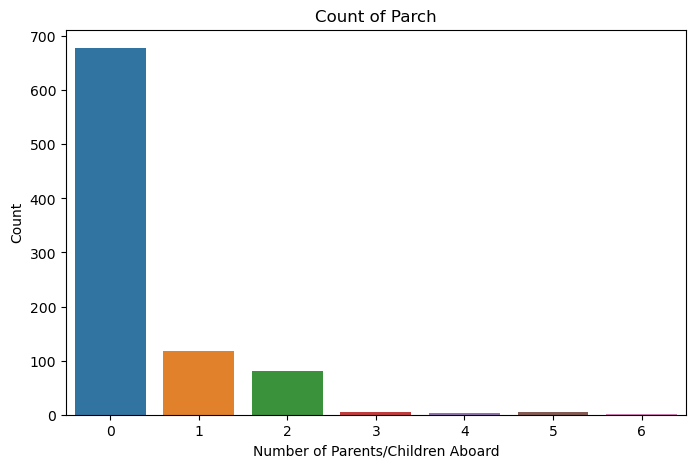


Frequency Counts and Percentages for Parch:


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64

In [31]:
#Countplot of the 'Parch' column
plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', data=df)
plt.title('Count of Parch')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

# Print customized frequency counts and percentages for Parch
parch_counts = df['Parch'].value_counts()
parch_percentages = (parch_counts / len(df)) * 100

print("\nFrequency Counts and Percentages for Parch:")
display(parch_counts)
display(parch_percentages)

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


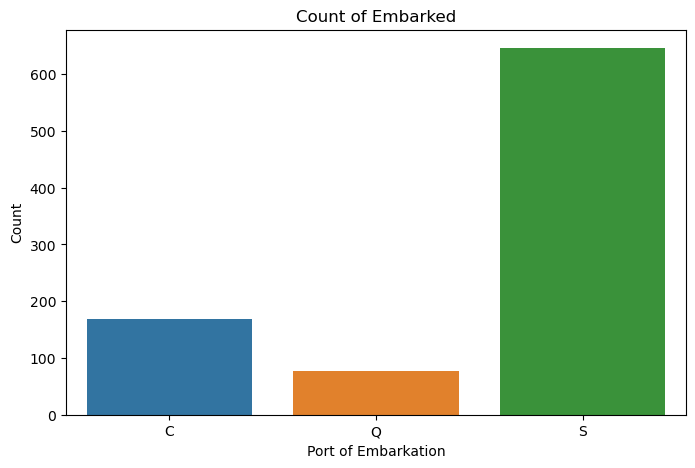


Frequency Counts and Percentages for Embarked:


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64

In [32]:
# Countplot of the 'Embarked' column
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Count of Embarked')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

# Print customized frequency counts and percentages for Embarked
embarked_counts = df['Embarked'].value_counts()
embarked_percentages = (embarked_counts / len(df)) * 100

print("\nFrequency Counts and Percentages for Embarked:")
display(embarked_counts)
display(embarked_percentages)

/tmp/ipykernel_37789/902276471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


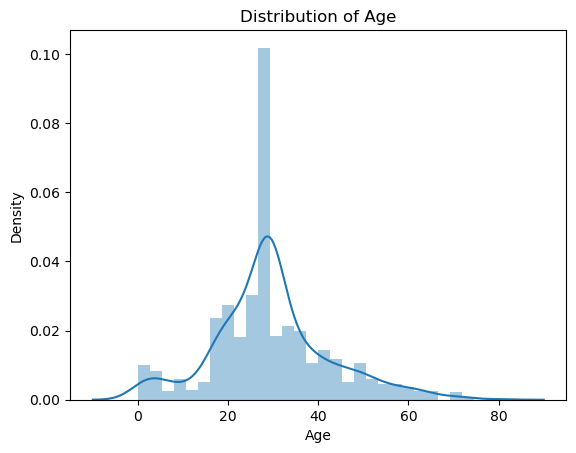

Skewness of Age: 0.4596
Kurtosis of Age: 0.9866


In [33]:
# Distplot for 'Age'
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Print skewness and kurtosis for 'Age'
print(f"Skewness of Age: {df['Age'].skew():.4f}")
print(f"Kurtosis of Age: {df['Age'].kurt():.4f}")

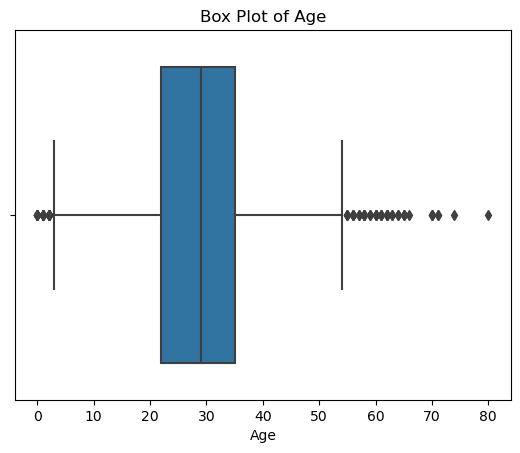

In [37]:
# Boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [39]:
# Just out of curiosity

print("People with age in Between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1",df[df['Age']<1].shape[0])

People with age in Between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 7


# Conclusion

* For all practical purposes age can be considered as normal distribution.
* Deeper analysis is required for outlier detection.

/tmp/ipykernel_37789/2743011089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


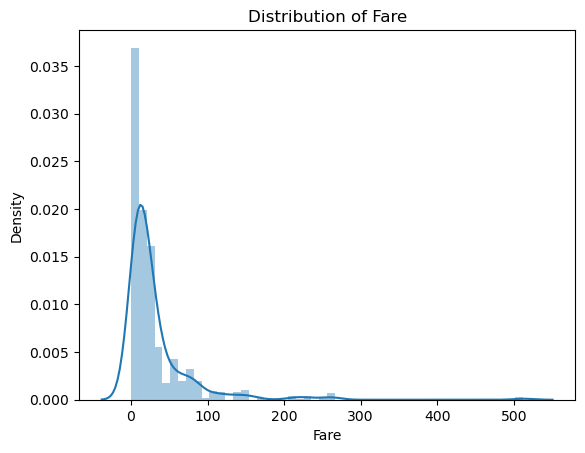

Skewness of Fare: 4.7873
Kurtosis of Fare: 33.3981


In [41]:
# Distplot for 'Fare'
sns.distplot(df['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# Print skewness and kurtosis for 'Fare'
print(f"Skewness of Fare: {df['Fare'].skew():.4f}")
print(f"Kurtosis of Fare: {df['Fare'].kurt():.4f}")

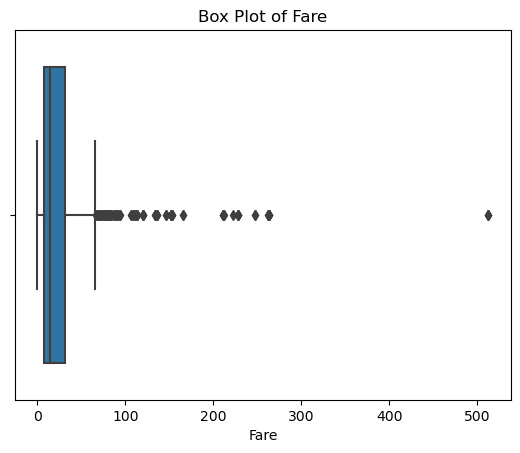

In [43]:
# Boxplot for 'Fare'
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()

In [44]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare greater than $300 3


# Conclusion

* Highly skewed data, a lot of people had cheaper tickets.
* Outliers are there in the data.

# Multivariate analysis

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


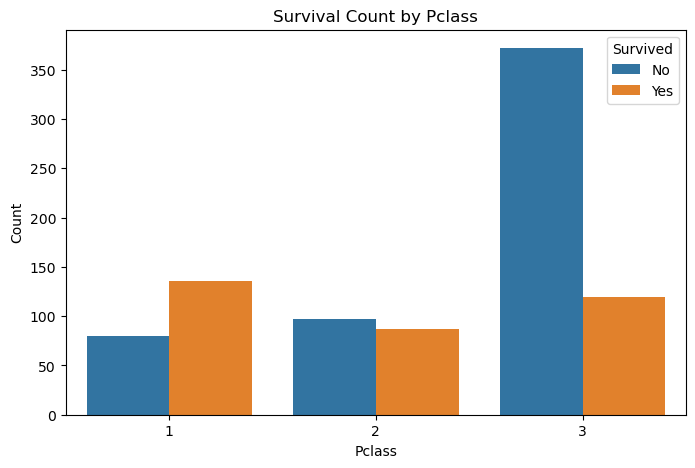


Survival Rate (%) by Pclass:


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [45]:
# Relationship between Survived and Pclass (categorical features)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Pclass'], hue=df['Survived'], data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Crosstab of Survived and Pclass with percentages
print("\nSurvival Rate (%) by Pclass:")
survival_rate_pclass = pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)
display(survival_rate_pclass)

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


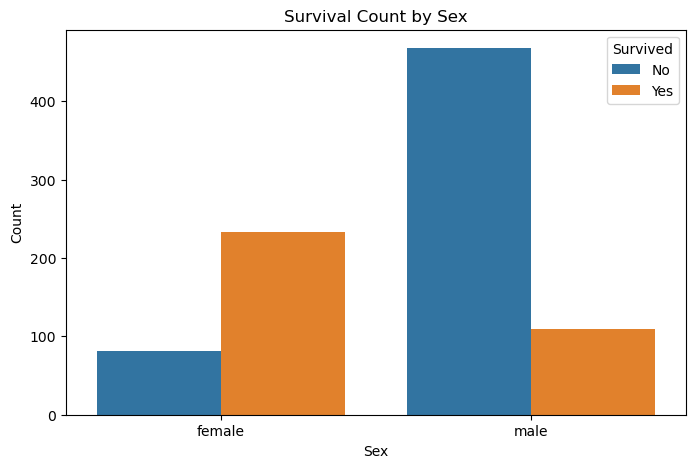


Survival Rate (%) by Sex:


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [46]:
# Relationship between Survived and Sex (categorical features)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sex'], hue=df['Survived'], data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Crosstab of Survived and Sex with percentages
print("\nSurvival Rate (%) by Sex:")
survival_rate_sex = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)
display(survival_rate_sex)

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


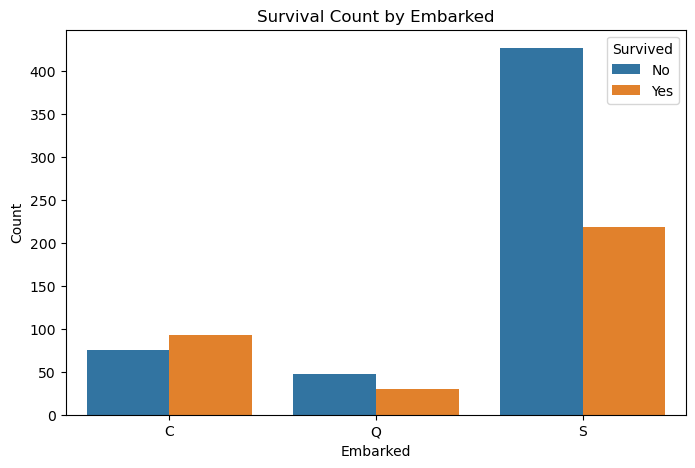


Survival Rate (%) by Embarked:


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


In [47]:
# Relationship between Survived and Embarked (categorical features)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Embarked'], hue=df['Survived'], data=df)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Crosstab of Survived and Embarked with percentages
print("\nSurvival Rate (%) by Embarked:")
survival_rate_embarked = pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)
display(survival_rate_embarked)

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


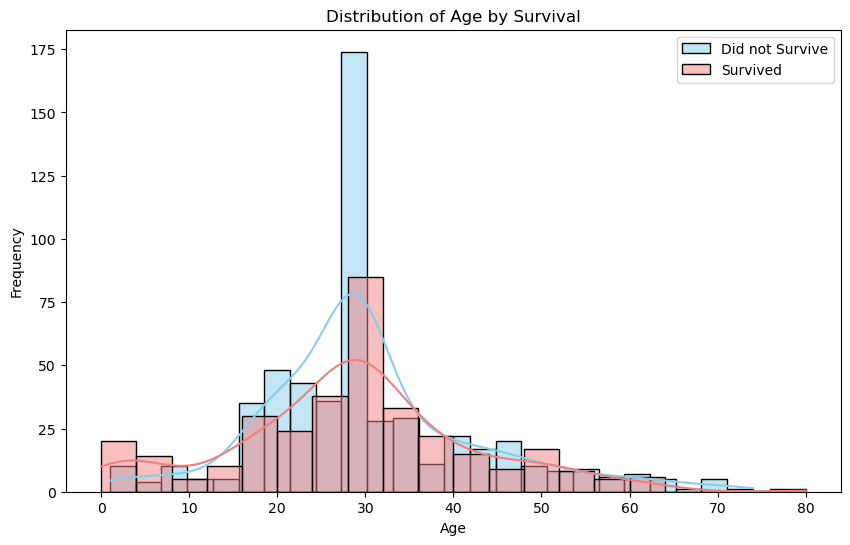

In [51]:
# Survival with Age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived']==0]['Age'], kde=True, color='skyblue', label='Did not Survive')
sns.histplot(df[df['Survived']==1]['Age'], kde=True, color='lightcoral', label='Survived')
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


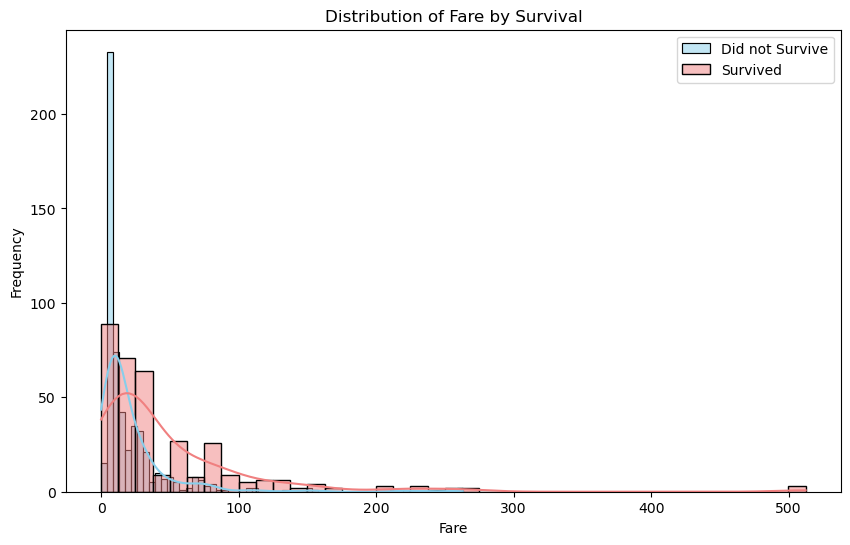

In [52]:
# Survival with Fare
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived']==0]['Fare'], kde=True, color='skyblue', label='Did not Survive')
sns.histplot(df[df['Survived']==1]['Fare'], kde=True, color='lightcoral', label='Survived')
plt.title('Distribution of Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/harshit-kumar-shivam/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

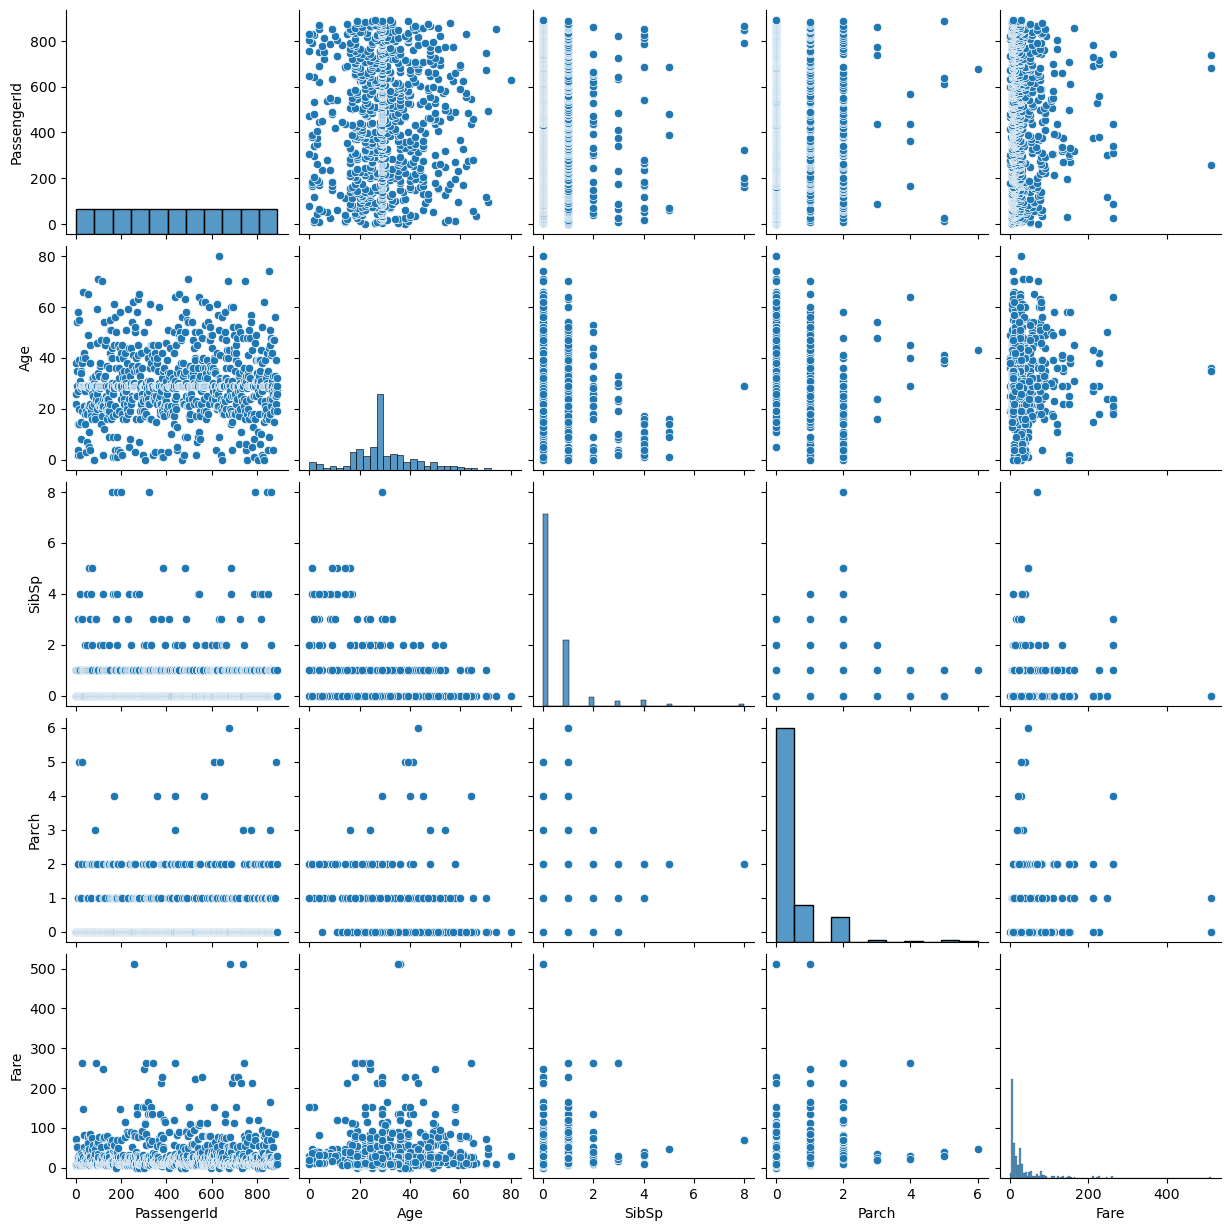

In [54]:
sns.pairplot(df)

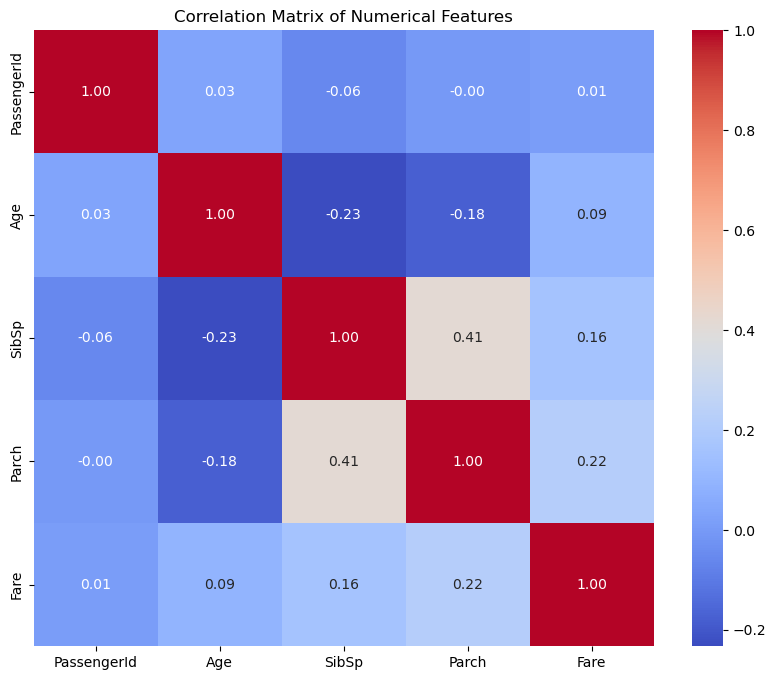

In [56]:
# Calculate the correlation matrix for numerical features
# Exclude non-numeric columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering

In [58]:
# We will create a new column name Family which will be the sum of SibSp and Parch cols

df['family_size'] = df['Parch'] + df['SibSp']

In [59]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
16,17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.1250,Q,5
554,555,1,3,"Ohman, Miss. Velin",female,22,0,0,347085,7.7750,S,0
702,703,0,3,"Barbara, Miss. Saiide",female,18,0,1,2691,14.4542,C,1
860,861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,14.1083,S,2
589,590,0,3,"Murdlin, Mr. Joseph",male,29,0,0,A./5. 3235,8.0500,S,0


In [60]:
# Now we will engineer a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number > 0 and number <=4:
        return "Medium"
    else:
        return "Large"

In [61]:
df['family_type']= df['family_size'].apply(family_type)

In [62]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
269,270,1,1,"Bissette, Miss. Amelia",female,35,0,0,PC 17760,135.6333,S,0,Alone
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,C,1,Medium
160,161,0,3,"Cribb, Mr. John Hatfield",male,44,0,1,371362,16.1000,S,1,Medium
536,537,0,1,"Butt, Major. Archibald Willingham",male,45,0,0,113050,26.5500,S,0,Alone
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29,0,0,W./C. 14263,10.5000,S,0,Alone


In [63]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [64]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,29,330980,7.8792,Q,Alone
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,29,370375,7.7500,Q,Alone
271,272,1,3,"Tornquist, Mr. William Henry",male,25,LINE,0.0000,S,Alone
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43,CA 2144,46.9000,S,Large
193,194,1,2,"Navratil, Master. Michel M",male,3,230080,26.0000,S,Medium


In [65]:
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting outliers

## Numerical Data
* If the data is following normal distribution, anything beyond 3SD - mean + 3SD can be considered as an outlier
* If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR


## Categorical data
* If the col is highly imbalnced for eg male 10000 and female 2 then we can eliminate female

In [66]:
# Handling outliers in age(Almost normal)
df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(884, 10)

In [68]:
# handling outliers from Fare column
# Finding quartiles
Q1= np.percentile(df['Fare'],25)
Q3= np.percentile(df['Fare'],75)

outlier_low=Q1 - 1.5 * (Q3 - Q1)
outlier_high=Q3 + 1.5 * (Q3 - Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

In [69]:
# One hot encoding
df.sample(4)
# Cols to be transformed are Pclass, Sex, Embarked, family_type
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,False,False,True,False,False,False,False


In [70]:
df = pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

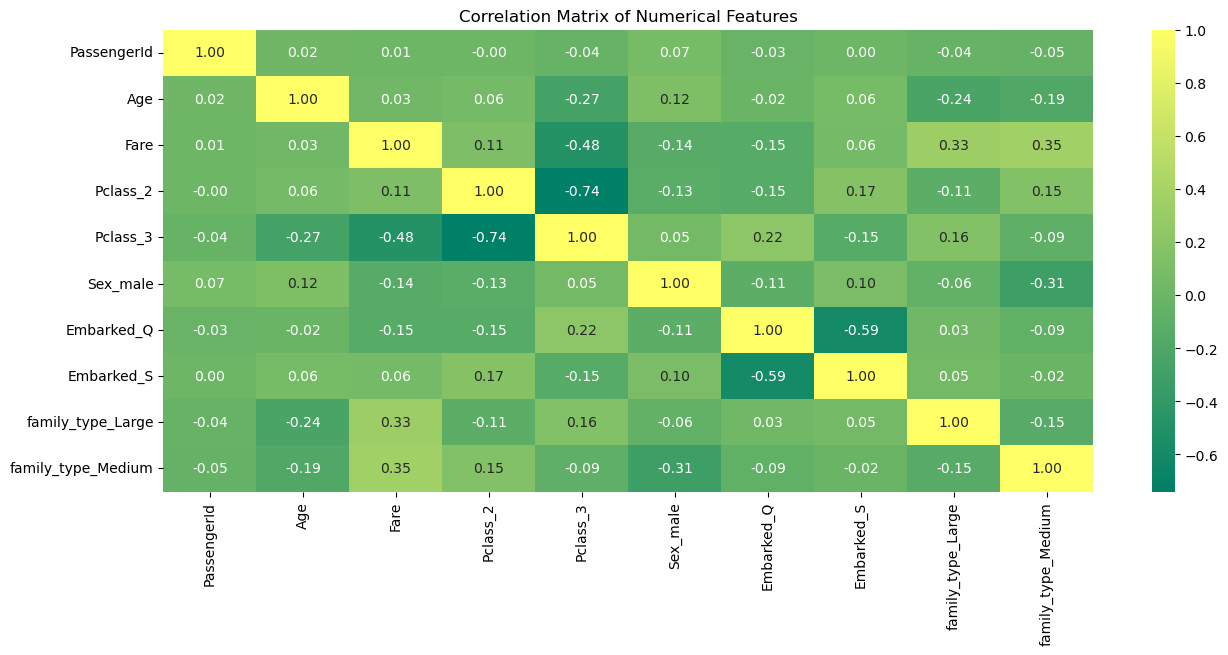

In [72]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), cmap='summer', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Drawing Conclusions
* Chance of female survival is higher than male survival
* Travelling in Pclass 3 was deadliest
* Somehow, people going to C survived more
* People in the age range of 20 to 40 had a higher chance of not surviving
* People travelling with smaller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone

In [73]:
# Save the final cleaned Titanic dataset
df.to_csv("titanic_cleaned.csv", index=False)